### Loading Packages and Data

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 8)

#import xarray as xr
import warnings
warnings.filterwarnings('ignore')
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
ls /share/costeffectiveness/results/vivarium_nih_us_cvd/model_1/nih_us_cvd/alabama/2022_07_29_16_19_31/

__pycache__/   keyspace.yaml             output.hdf
branches.yaml  logs/                     requirements.txt
count_data/    model_specification.yaml  settings.py


In [3]:
ls /share/costeffectiveness/results/vivarium_nih_us_cvd/model_1/nih_us_cvd/alabama/2022_07_29_16_19_31/count_data/

deaths.csv      population.hdf         transition_count.csv  ylds.hdf
deaths.hdf      state_person_time.csv  transition_count.hdf  ylls.csv
population.csv  state_person_time.hdf  ylds.csv              ylls.hdf


In [4]:
sim_results_dir = '/share/costeffectiveness/results/vivarium_nih_us_cvd/model_1/nih_us_cvd/alabama/2022_07_29_16_19_31/count_data/'

### Exploring Data

In [5]:
deaths = pd.read_csv(sim_results_dir + 'deaths.csv')

In [6]:
deaths.head()

,Unnamed: 0,sex,year,cause,measure,input_draw,scenario,age,value
0,0,female,2023,acute_ischemic_stroke,deaths,29,baseline,25_to_29,0
1,1,female,2023,acute_ischemic_stroke,deaths,29,baseline,30_to_34,0
2,2,female,2023,acute_ischemic_stroke,deaths,29,baseline,35_to_39,0
3,3,female,2023,acute_ischemic_stroke,deaths,29,baseline,40_to_44,0
4,4,female,2023,acute_ischemic_stroke,deaths,29,baseline,45_to_49,0


In [7]:
deaths.year.unique()

array([2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033,
       2034, 2035, 2036, 2037, 2038, 2039, 2040])

In [8]:
deaths.cause.unique()

array(['acute_ischemic_stroke', 'chronic_ischemic_stroke', 'other_causes'],
      dtype=object)

In [9]:
deaths.sex.unique()

array(['female', 'male'], dtype=object)

In [10]:
deaths.input_draw.nunique()

10

In [11]:
pop = pd.read_csv(sim_results_dir + 'population.csv')

In [12]:
pop.head()

,Unnamed: 0,measure,input_draw,scenario,value
0,0,total_population,29,baseline,750000
1,1,total_population,232,baseline,750000
2,2,total_population,357,baseline,750000
3,3,total_population,394,baseline,750000
4,4,total_population,602,baseline,750000


In [13]:
pop.loc[pop.measure=="total_population_untracked"].value.sum()

122

In [14]:
pop.measure.unique()

array(['total_population', 'total_population_dead',
       'total_population_living', 'total_population_tracked',
       'total_population_untracked'], dtype=object)

In [15]:
tran = pd.read_csv(sim_results_dir + 'transition_count.csv')

In [16]:
tran.head()

,Unnamed: 0,sex,year,measure,input_draw,scenario,age,transition,disease,value
0,0,female,2023,transition_count,29,baseline,25_to_29,acute_ischemic_stroke_to_chronic_ischemic_stroke,ischemic_stroke,5
1,1,female,2023,transition_count,29,baseline,30_to_34,acute_ischemic_stroke_to_chronic_ischemic_stroke,ischemic_stroke,3
2,2,female,2023,transition_count,29,baseline,35_to_39,acute_ischemic_stroke_to_chronic_ischemic_stroke,ischemic_stroke,7
3,3,female,2023,transition_count,29,baseline,40_to_44,acute_ischemic_stroke_to_chronic_ischemic_stroke,ischemic_stroke,11
4,4,female,2023,transition_count,29,baseline,45_to_49,acute_ischemic_stroke_to_chronic_ischemic_stroke,ischemic_stroke,23


In [17]:
tran.transition.unique()

array(['acute_ischemic_stroke_to_chronic_ischemic_stroke',
       'chronic_ischemic_stroke_to_acute_ischemic_stroke',
       'susceptible_to_ischemic_stroke_to_acute_ischemic_stroke'],
      dtype=object)

### All Cause Mortality Graphs

In [103]:
result_summary = (deaths
                      .groupby(['age', 'sex', 'year'])
                      .value.describe(percentiles=[.025, .975])
                      .filter(['mean', '2.5%', '97.5%'])
                      .reset_index())

result_summary.head()

,age,sex,year,mean,2.5%,97.5%
0,25_to_29,female,2023,9.866667,0.0,36.100
1,25_to_29,female,2024,7.866667,0.0,28.825
2,25_to_29,female,2025,8.566667,0.0,29.550
3,25_to_29,female,2026,8.100000,0.0,32.100
4,25_to_29,female,2027,8.666667,0.0,30.000


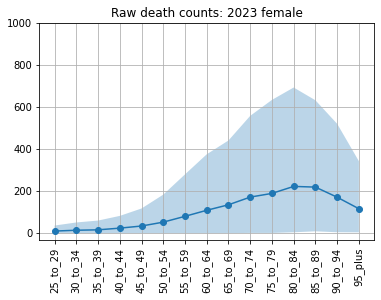

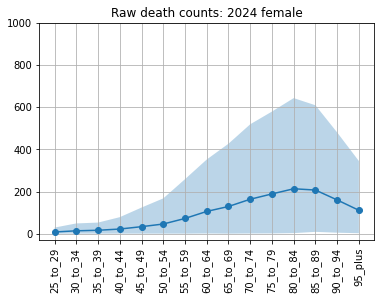

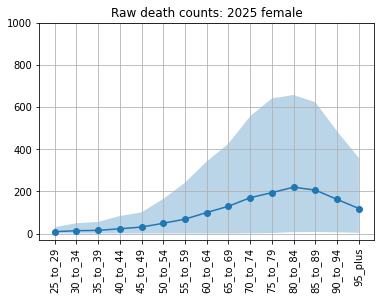

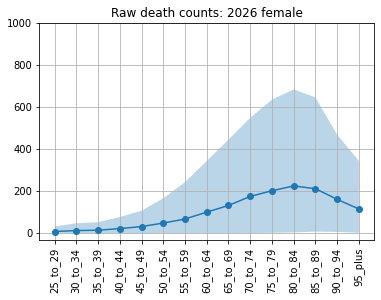

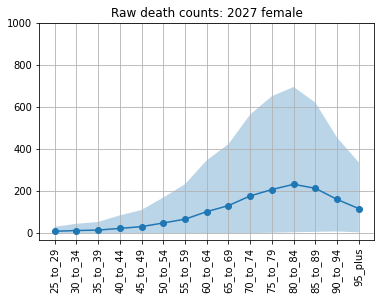

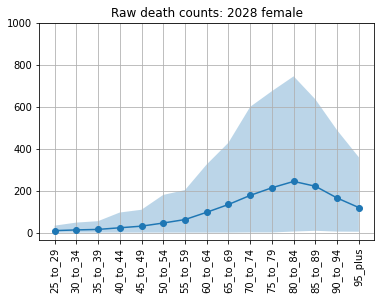

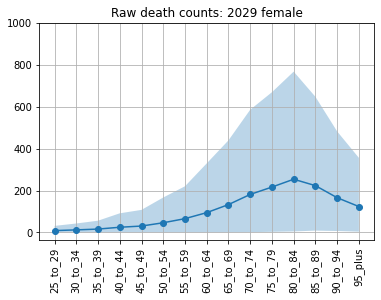

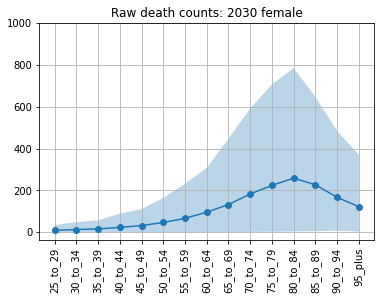

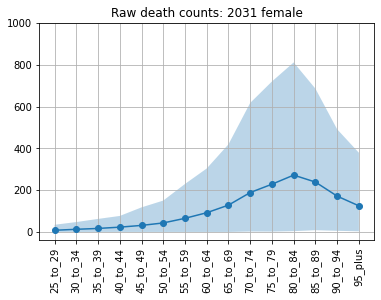

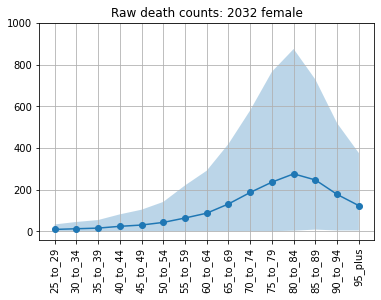

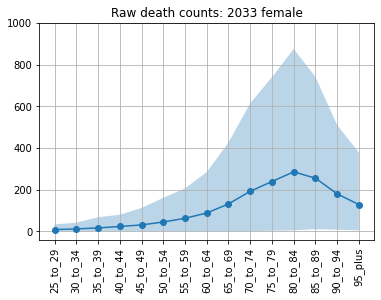

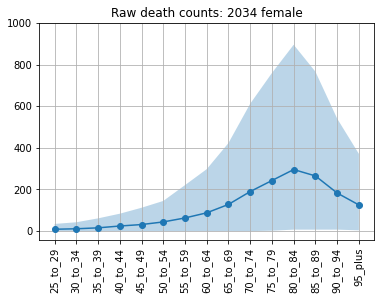

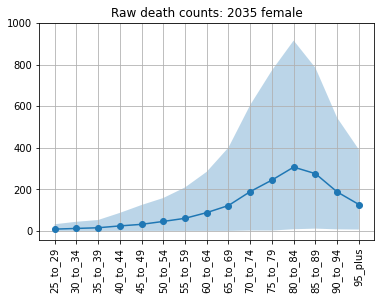

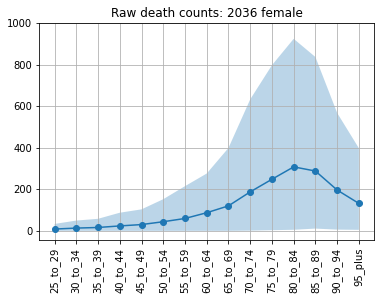

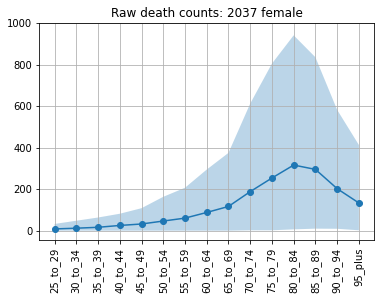

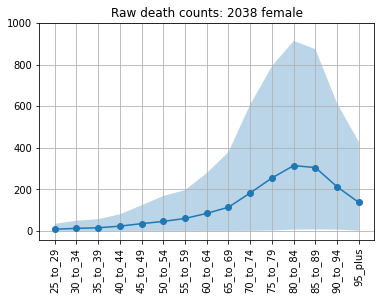

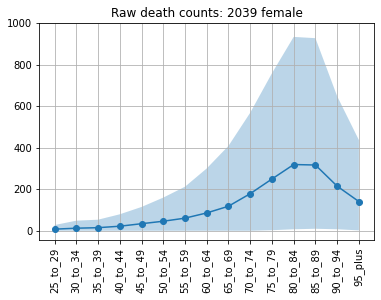

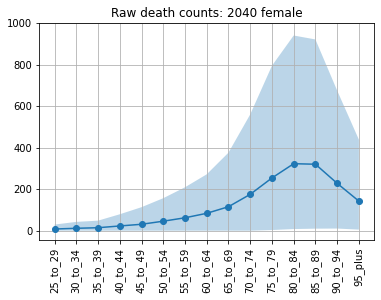

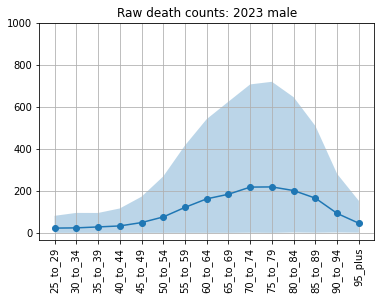

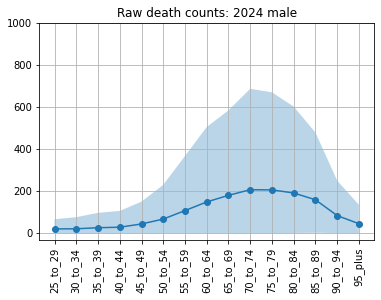

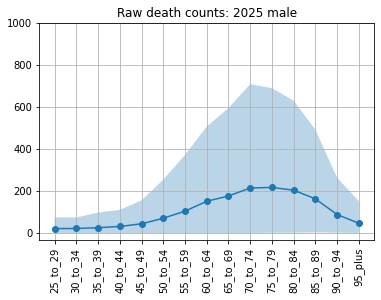

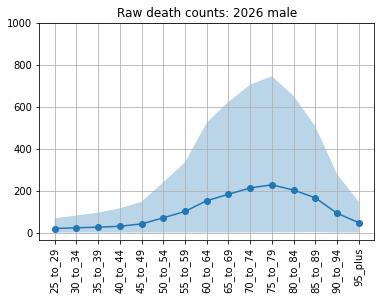

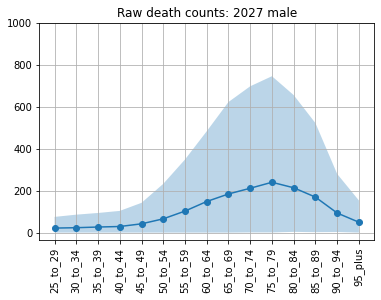

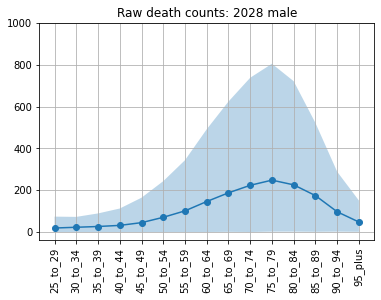

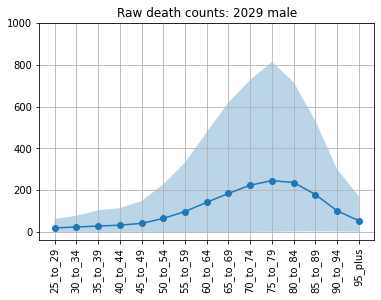

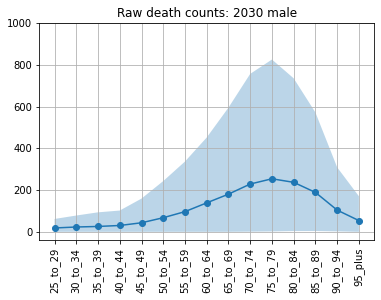

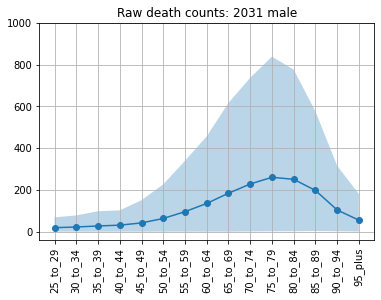

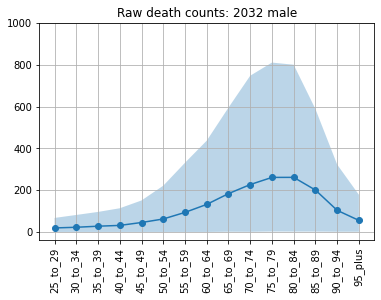

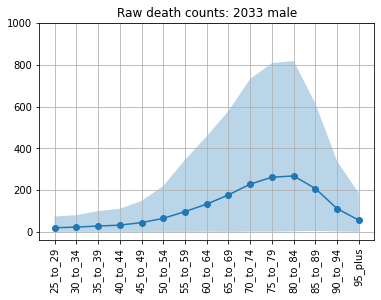

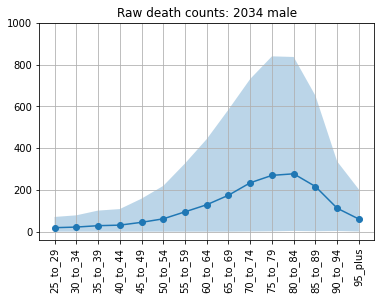

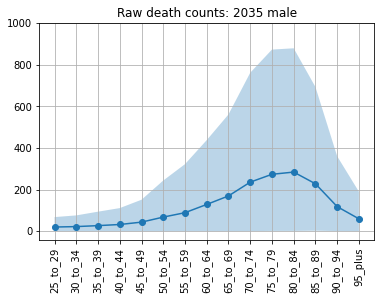

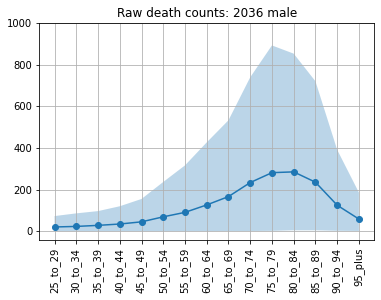

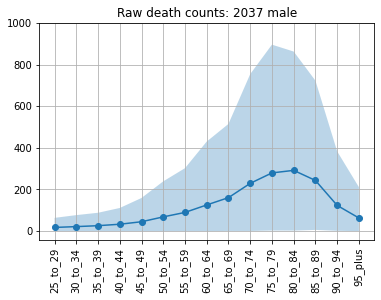

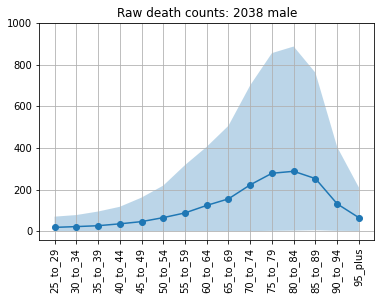

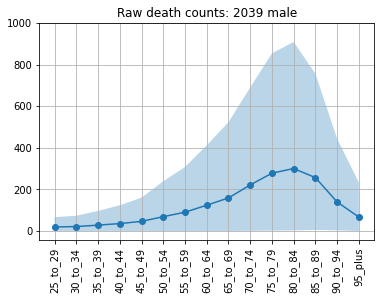

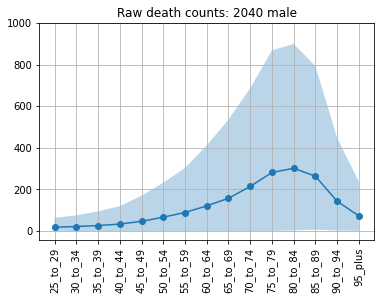

In [105]:
from matplotlib.backends.backend_pdf import PdfPages # PDF package

# this will output a PDF with a new plot on each page
# will be saved to the current working directory with the specified filename
with PdfPages('model1vv_raw_mortality_counts.pdf') as pdf:
    for sex in result_summary.sex.unique():
        for year in result_summary.year.unique():
            plt.figure() # this makes each new iteration of this code show up on a new figure
                         # otherwise, they would be overlaid on the same figure and automatically show up as different colors
            subdata = result_summary.loc[(result_summary.sex==sex) & (result_summary.year==year)]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            plt.fill_between(subdata['age'], subdata['2.5%'], subdata['97.5%'], alpha=.3)
            plt.title(f'Raw death counts: {year} {sex}') # handy formatting trick... you have to add the "f" before the quotation marks
            plt.xticks(rotation=90) # rotate for legibility of x-tick labels
            plt.ylim(ymax=1000)
            plt.grid()
            pdf.savefig(bbox_inches='tight')
            
            
# NOTE: this actually does appear to be increasing with age overtime
# however, this is probably because we're looking at counts instead of rates and is likely a 
# reflection of a changing age structure rather than issue with the cause model

# let's look again for rates

In [21]:
female_2023 = result_summary.loc[(result_summary['sex']=='female') & (result_summary['year']==2023)]
female_2023.head()

,age,sex,year,mean,2.5%,97.5%
0,25_to_29,female,2023,9.866667,0.0,36.100
36,30_to_34,female,2023,13.800000,0.0,50.825
72,35_to_39,female,2023,15.766667,0.0,59.825
108,40_to_44,female,2023,23.800000,0.0,82.025
144,45_to_49,female,2023,33.866667,0.0,117.275


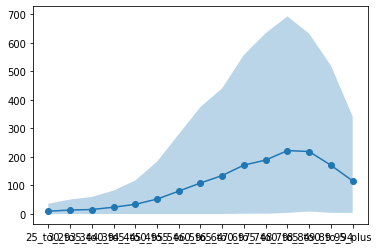

In [22]:
plt.plot(female_2023['age'], female_2023['mean'], marker='o')
plt.fill_between(female_2023['age'], female_2023['2.5%'], female_2023['97.5%'], alpha=.3)

# I'd say for ease of review it's best to have some sort of descriptive title at the top to orient the reviewer!

#### All Cause Mortality Graph with Rate

In [106]:
per_time = pd.read_csv(sim_results_dir + 'state_person_time.csv')
per_time = per_time.rename(columns = {'value':'ptvalue'})
per_time2 = per_time.groupby(['age', 'sex', 'year', 'input_draw']).ptvalue.sum().reset_index()

per_time2.head()

,age,sex,year,input_draw,ptvalue
0,25_to_29,female,2023,29,29969.774127
1,25_to_29,female,2023,232,30072.344969
2,25_to_29,female,2023,357,30068.971937
3,25_to_29,female,2023,394,30343.567420
4,25_to_29,female,2023,602,30302.017796


In [107]:
results_rate = deaths.groupby(['age', 'sex', 'year', 'input_draw']).value.sum().reset_index()
print(len(per_time))

16200


In [108]:
results_rate = pd.concat([results_rate, per_time2.ptvalue], axis=1)
results_rate.head()

,age,sex,year,input_draw,value,ptvalue
0,25_to_29,female,2023,29,31,29969.774127
1,25_to_29,female,2023,232,34,30072.344969
2,25_to_29,female,2023,357,26,30068.971937
3,25_to_29,female,2023,394,25,30343.567420
4,25_to_29,female,2023,602,25,30302.017796


In [109]:
results_rate['mean_rate'] = results_rate['value'] / results_rate['ptvalue']
results_rate.head()

,age,sex,year,input_draw,value,ptvalue,mean_rate
0,25_to_29,female,2023,29,31,29969.774127,0.001034
1,25_to_29,female,2023,232,34,30072.344969,0.001131
2,25_to_29,female,2023,357,26,30068.971937,0.000865
3,25_to_29,female,2023,394,25,30343.567420,0.000824
4,25_to_29,female,2023,602,25,30302.017796,0.000825


In [56]:
# here's an alternative way to do what you did above using pandas indices that I was talking about
# here for reference if you're interested, but also the way you did it definitely works too :) 
groupby_cols = ['age', 'sex', 'year', 'input_draw']
pt = pd.read_csv(sim_results_dir + 'state_person_time.csv').drop(columns='Unnamed: 0')
deaths = pd.read_csv(sim_results_dir + 'deaths.csv').drop(columns='Unnamed: 0')
acmr = deaths.groupby(groupby_cols).sum() / pt.groupby(groupby_cols).sum() # this way we don't have to join dataframes
acmr_summarized = (acmr.groupby([c for c in groupby_cols if c != 'input_draw'])
                   .value.describe(percentiles=[0.025, 0.975])
                   .filter(['mean', '2.5%', '97.5%'])
                  )
                 
acmr_summarized

mean      2.5%     97.5%
age      sex    year                              
25_to_29 female 2023  0.000981  0.000824  0.001259
                2024  0.000848  0.000550  0.001099
                2025  0.000932  0.000752  0.001101
                2026  0.000892  0.000534  0.001246
...                        ...       ...       ...
95_plus  male   2037  0.275615  0.247320  0.309777
                2038  0.275422  0.248321  0.323379
                2039  0.268613  0.233470  0.293403
                2040  0.282955  0.251180  0.319381

[540 rows x 3 columns]

In [110]:
result_summary = (results_rate
                      .groupby(['age', 'sex', 'year'])
                      .mean_rate.describe(percentiles=[.025, .975])
                      .filter(['mean', '2.5%', '97.5%'])
                      .reset_index())

result_summary.head()

,age,sex,year,mean,2.5%,97.5%
0,25_to_29,female,2023,0.000981,0.000824,0.001259
1,25_to_29,female,2024,0.000848,0.000550,0.001099
2,25_to_29,female,2025,0.000932,0.000752,0.001101
3,25_to_29,female,2026,0.000892,0.000534,0.001246
4,25_to_29,female,2027,0.000965,0.000590,0.001114


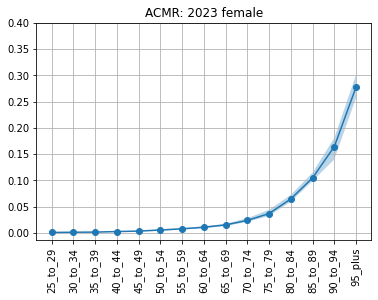

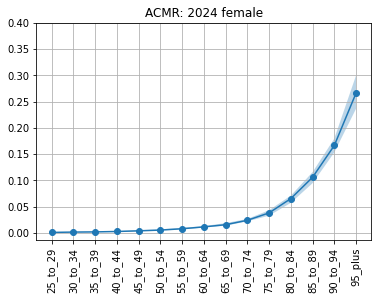

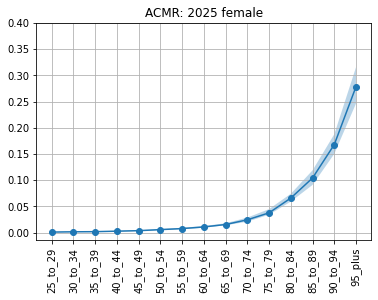

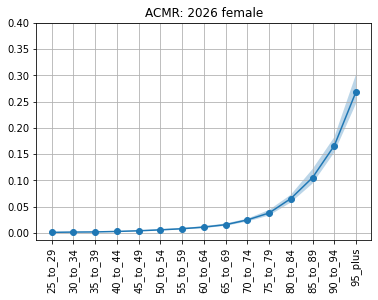

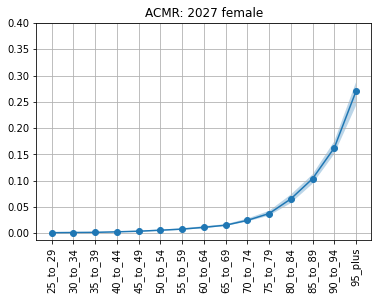

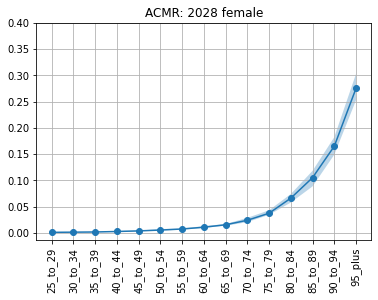

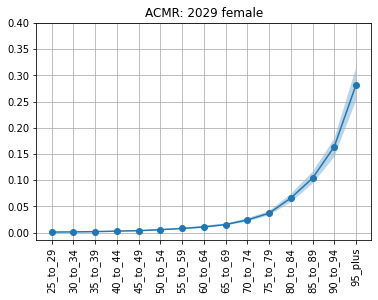

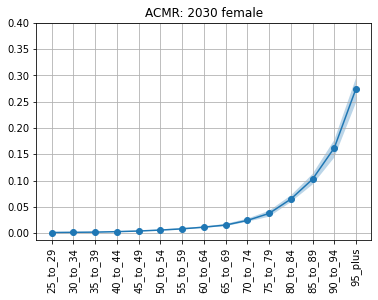

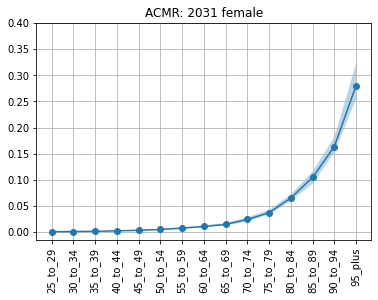

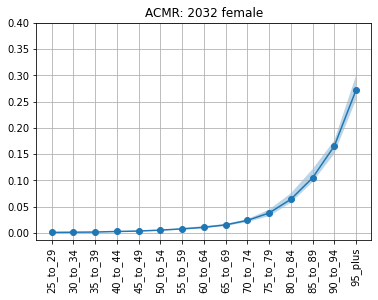

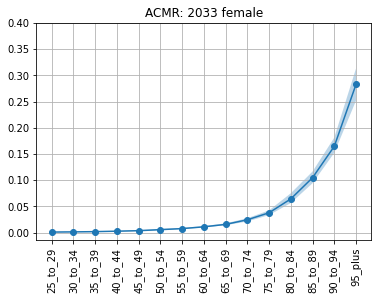

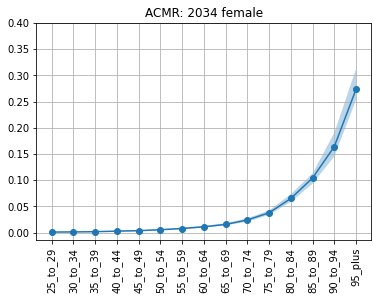

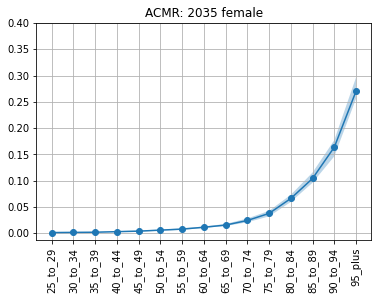

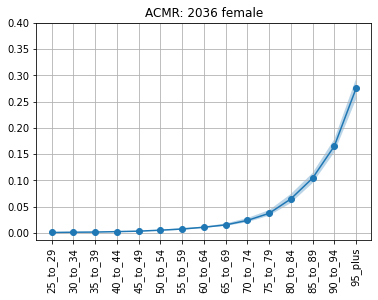

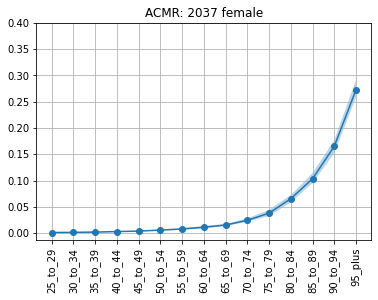

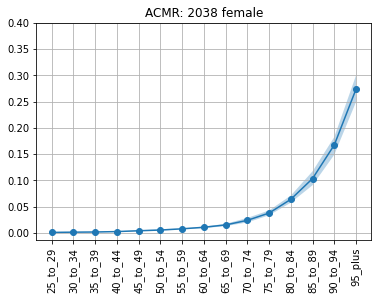

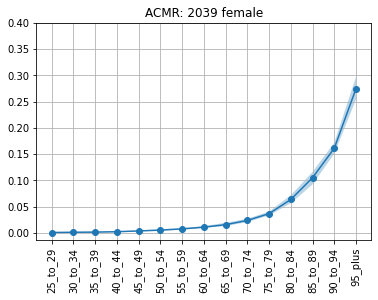

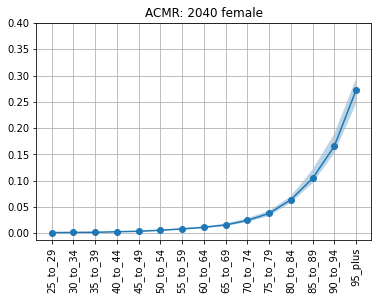

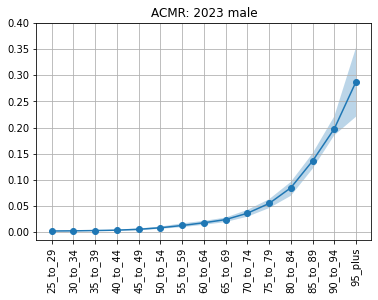

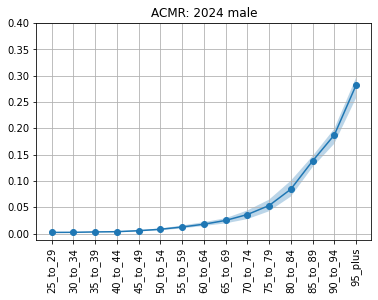

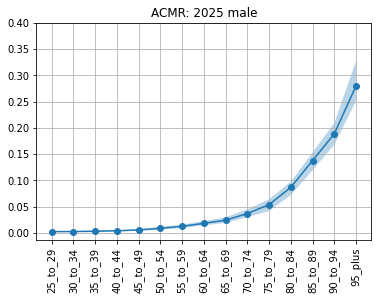

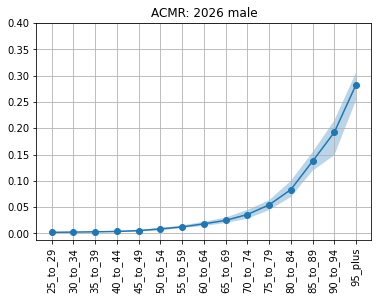

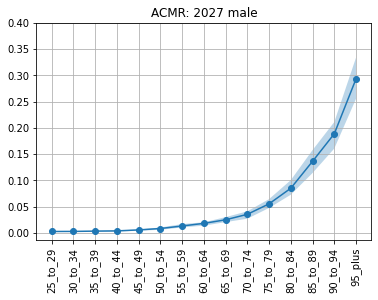

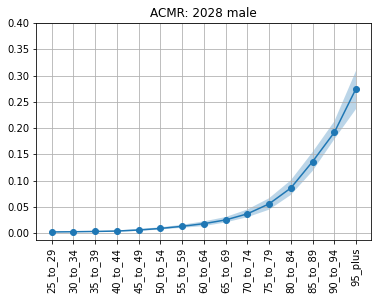

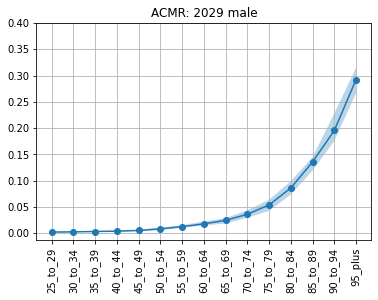

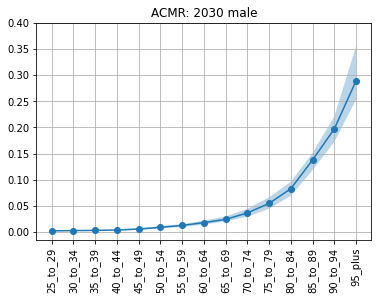

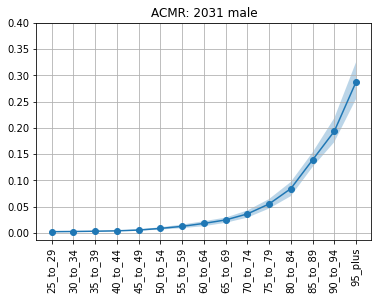

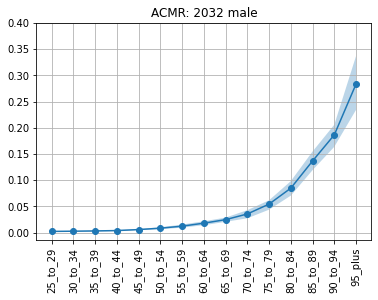

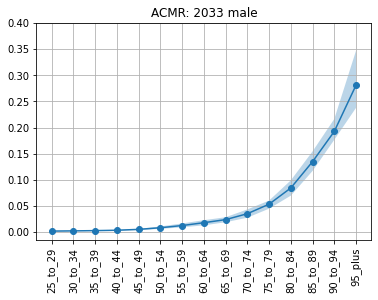

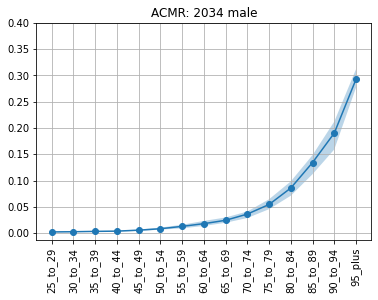

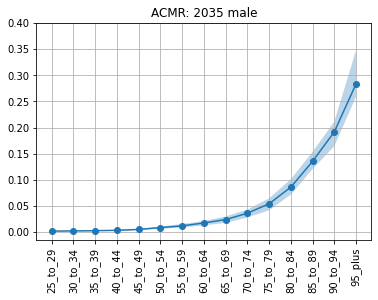

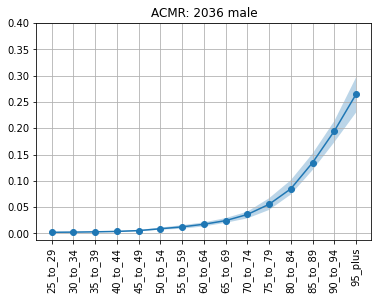

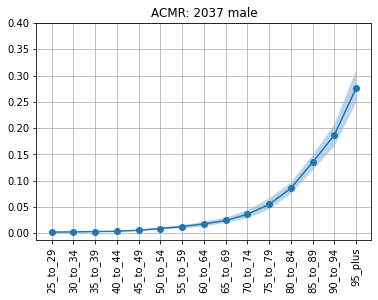

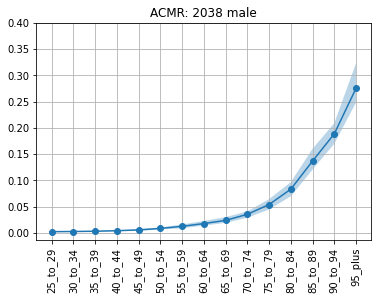

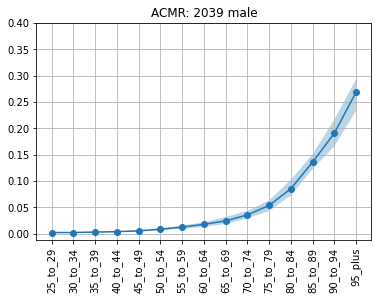

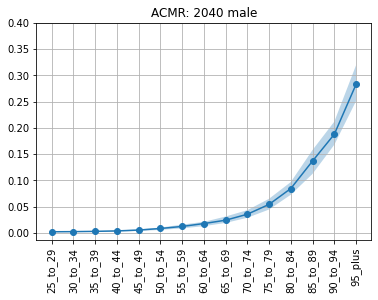

In [115]:
# again for ACMR
with PdfPages('model1vv_acmr.pdf') as pdf:
    for sex in result_summary.sex.unique():
        for year in result_summary.year.unique():
            plt.figure() 
            subdata = result_summary.loc[(result_summary.sex==sex) & (result_summary.year==year)]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            plt.fill_between(subdata['age'], subdata['2.5%'], subdata['97.5%'], alpha=.3)
            plt.title(f'ACMR: {year} {sex}') 
            plt.xticks(rotation=90) 
            plt.ylim(ymax=0.4)
            plt.grid()
            pdf.savefig(bbox_inches='tight')
            
# this one doesn't seem to have a trend

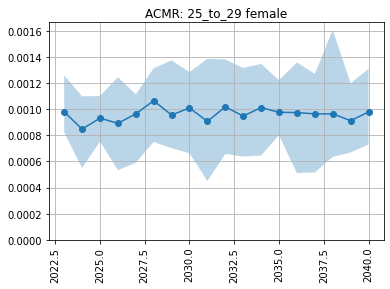

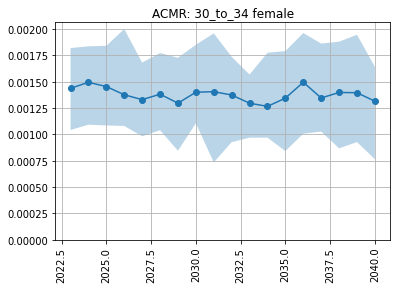

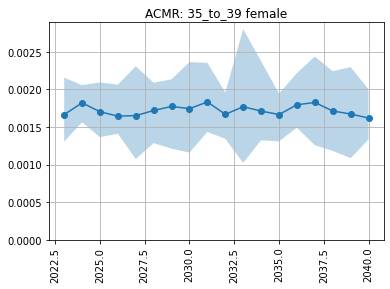

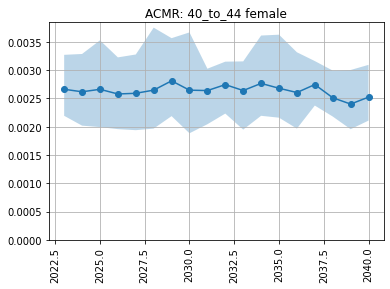

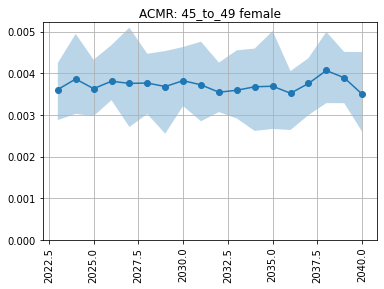

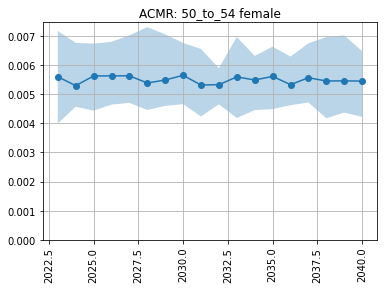

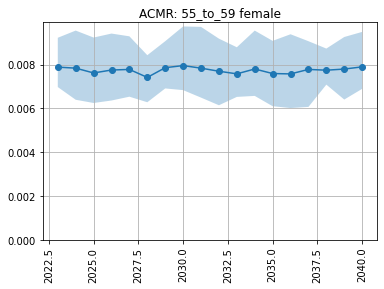

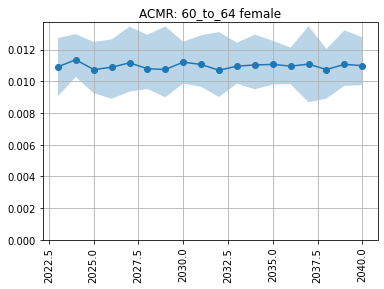

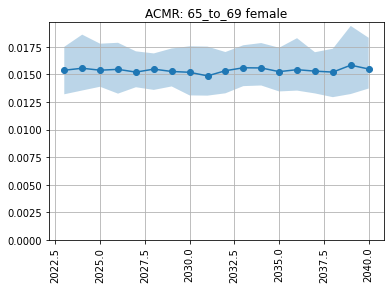

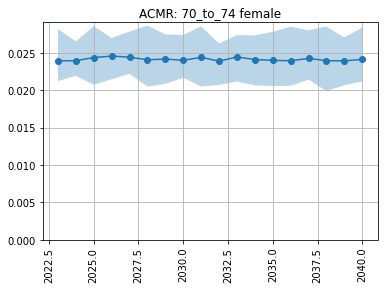

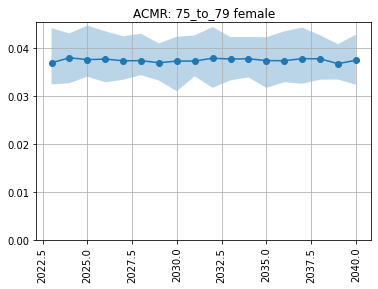

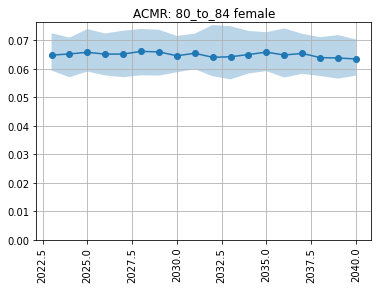

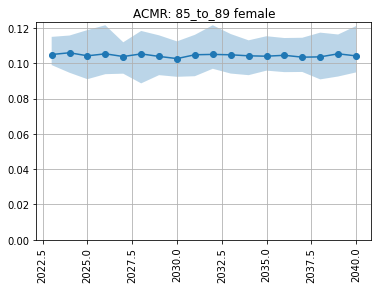

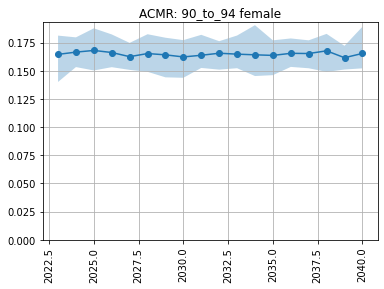

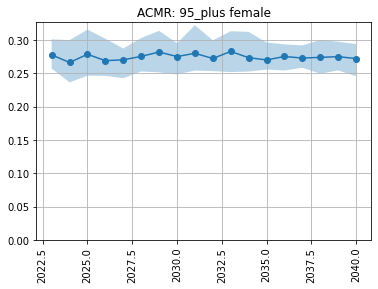

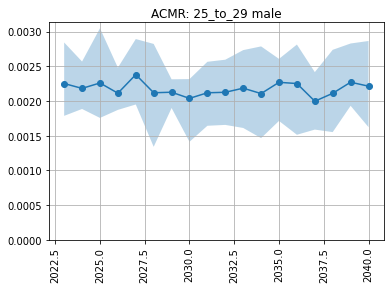

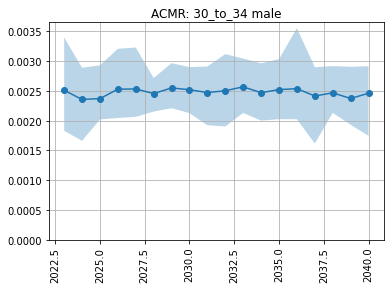

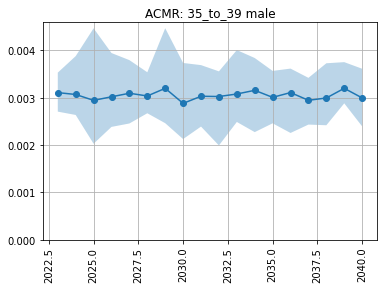

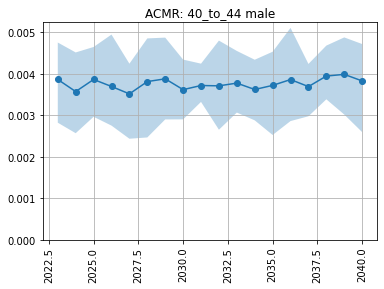

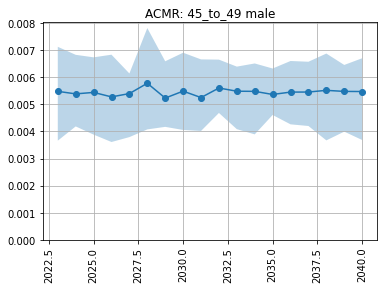

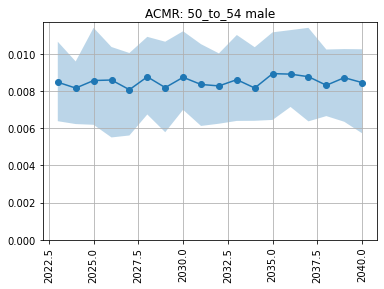

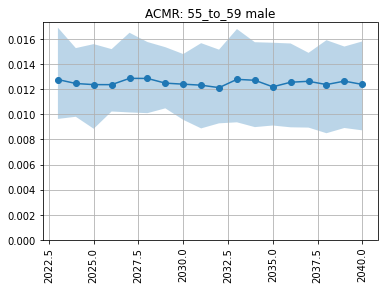

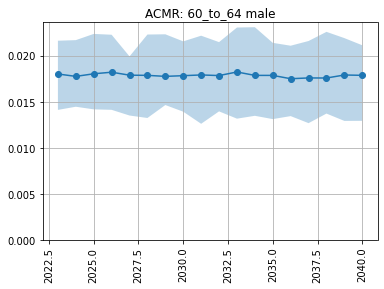

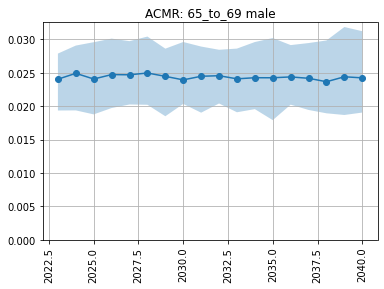

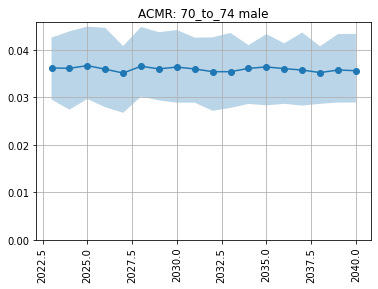

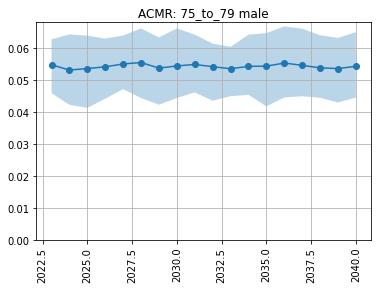

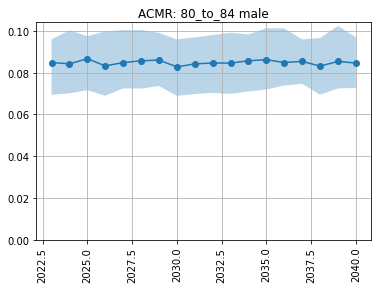

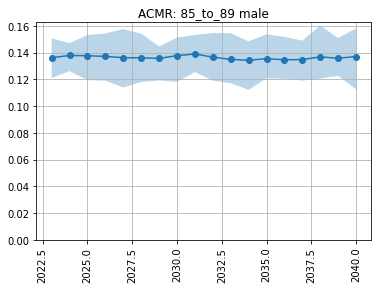

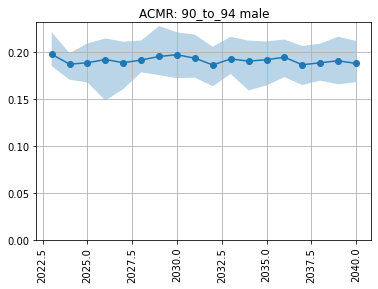

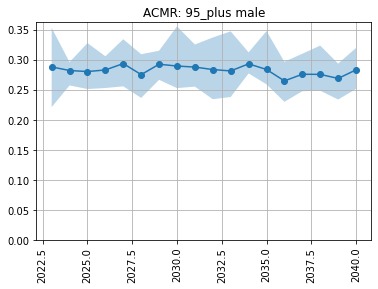

In [118]:
# again for ACMR, this time with reversea age/year variables
with PdfPages('model1vv_acmr_by_year.pdf') as pdf:
    for sex in result_summary.sex.unique():
        for age in result_summary.age.unique():
            plt.figure() 
            subdata = result_summary.loc[(result_summary.sex==sex) & (result_summary.age==age)]
            plt.plot(subdata['year'], subdata['mean'], marker='o')
            plt.fill_between(subdata['year'], subdata['2.5%'], subdata['97.5%'], alpha=.3)
            plt.title(f'ACMR: {age} {sex}') 
            plt.xticks(rotation=90) 
            plt.ylim(ymin=0) # when I'm looking at trends over time like this I like to anchor at zero
                # so that we can see if the magnitude of the wiggle is signifiant in relation to the 
                # magnitude of the actual value
            plt.grid()
            pdf.savefig(bbox_inches='tight')
            
# this one doesn't seem to have a trend

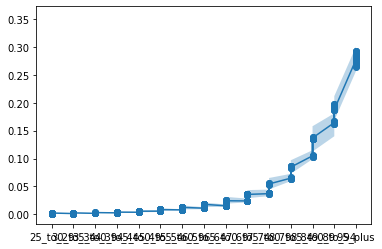

In [57]:
plt.plot(result_summary['age'], result_summary['mean'], marker='o')
plt.fill_between(result_summary['age'], result_summary['2.5%'], result_summary['97.5%'], alpha=.3)


In [102]:
male_2037 = result_summary.loc[(result_summary['sex']=='male') & (result_summary['year']==2037)]
male_2037.head()

,age,sex,year,mean,2.5%,97.5%
32,25_to_29,male,2037,0.001997,0.001588,0.002416
68,30_to_34,male,2037,0.002415,0.001617,0.002899
104,35_to_39,male,2037,0.002947,0.002434,0.003421
140,40_to_44,male,2037,0.003693,0.002977,0.004238
176,45_to_49,male,2037,0.005454,0.004200,0.006572


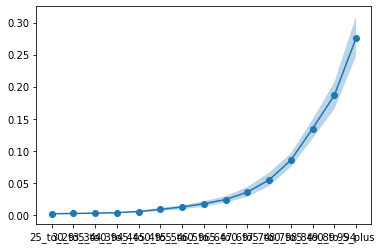

In [30]:
plt.plot(male_2037['age'], male_2037['mean'], marker='o')
plt.fill_between(male_2037['age'], male_2037['2.5%'], male_2037['97.5%'], alpha=.3)

### Cause Specific Mortality Graphs
#### Acute Stroke

In [31]:
working = (deaths
               .groupby(['age', 'sex', 'year', 'cause'])
               .value.describe(percentiles=[.025, .975])
               .filter(['mean', '2.5%', '97.5%'])
               .reset_index())

acute = working.loc[(working['cause'] == 'acute_ischemic_stroke')].reset_index()

acute.head()

,index,age,sex,year,cause,mean,2.5%,97.5%
0,0,25_to_29,female,2023,acute_ischemic_stroke,0.1,0.0,0.775
1,3,25_to_29,female,2024,acute_ischemic_stroke,0.2,0.0,1.000
2,6,25_to_29,female,2025,acute_ischemic_stroke,0.0,0.0,0.000
3,9,25_to_29,female,2026,acute_ischemic_stroke,0.1,0.0,0.775
4,12,25_to_29,female,2027,acute_ischemic_stroke,0.1,0.0,0.775


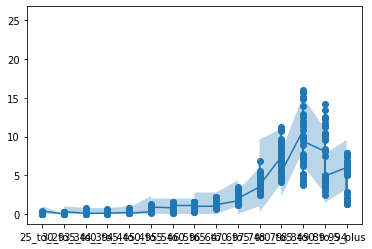

In [32]:
plt.plot(acute['age'], acute['mean'], marker='o')
plt.fill_between(acute['age'], acute['2.5%'], acute['97.5%'], alpha=.3)

In [33]:
female_2023_acute = acute.loc[(acute['sex']=='female') & (acute['year']==2023)]
female_2023_acute.head()

,index,age,sex,year,cause,mean,2.5%,97.5%
0,0,25_to_29,female,2023,acute_ischemic_stroke,0.1,0.0,0.775
36,108,30_to_34,female,2023,acute_ischemic_stroke,0.0,0.0,0.000
72,216,35_to_39,female,2023,acute_ischemic_stroke,0.1,0.0,0.775
108,324,40_to_44,female,2023,acute_ischemic_stroke,0.1,0.0,0.775
144,432,45_to_49,female,2023,acute_ischemic_stroke,0.2,0.0,1.000


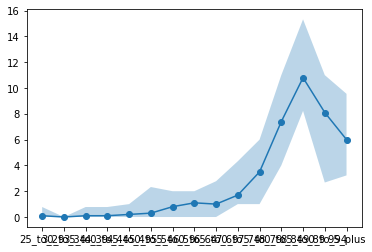

In [34]:
plt.plot(female_2023_acute['age'], female_2023_acute['mean'], marker='o')
plt.fill_between(female_2023_acute['age'], female_2023_acute['2.5%'], female_2023_acute['97.5%'], alpha=.3)

In [90]:
death_rate = deaths.groupby(['age', 'sex', 'year', 'input_draw', 'cause']).value.sum().reset_index()
acute_rate = death_rate.loc[(death_rate['cause'] == 'acute_ischemic_stroke')].reset_index()
acute_rate.head()

,index,age,sex,year,input_draw,cause,value
0,0,25_to_29,female,2023,29,acute_ischemic_stroke,0
1,3,25_to_29,female,2023,232,acute_ischemic_stroke,0
2,6,25_to_29,female,2023,357,acute_ischemic_stroke,0
3,9,25_to_29,female,2023,394,acute_ischemic_stroke,0
4,12,25_to_29,female,2023,602,acute_ischemic_stroke,0


In [91]:
per_time.ptvalue.head()
len(per_time.ptvalue)

16200

In [95]:
acute_rate_2 = pd.concat([acute_rate, per_time.ptvalue], axis=1)
acute_rate_2['mean_rate'] = acute_rate_2['value'] / acute_rate_2['ptvalue']
acute_rate_summary = (acute_rate_2
                      .groupby(['age', 'sex', 'year'])
                      .mean_rate.describe(percentiles=[.025, .975])
                      .filter(['mean', '2.5%', '97.5%'])
                      .reset_index())

acute_rate_summary.head()

FloatingPointError: invalid value encountered in subtract

In [ ]:
plt.plot(acute_rate_summary['age'], acute_rate_summary['mean'], marker='o')
plt.fill_between(acute_rate_summary['age'], acute_rate_summary['2.5%'], acute_rate_summary['97.5%'], alpha=.3)

In [ ]:
male_2028_acute_rate = acute_rate_summary.loc[(acute_rate_summary['sex']=='male') & (acute_rate_summary['year']==2028)]
male_2028_acute_rate.head()

In [ ]:
plt.plot(male_2028_acute_rate['age'], male_2028_acute_rate['mean'], marker='o')
plt.fill_between(male_2028_acute_rate['age'], male_2028_acute_rate['2.5%'], male_2028_acute_rate['97.5%'], alpha=.3)

#### Chronic Stroke

In [ ]:
chronic_rate = death_rate.loc[(death_rate['cause'] == 'chronic_ischemic_stroke')].reset_index()
chronic_rate = pd.concat([chronic_rate, per_time.ptvalue], axis=1)
chronic_rate['mean_rate'] = chronic_rate['value'] / chronic_rate['ptvalue']
chronic_rate = (chronic_rate
                      .groupby(['age', 'sex', 'year'])
                      .mean_rate.describe(percentiles=[.025, .975])
                      .filter(['mean', '2.5%', '97.5%'])
                      .reset_index())

chronic_rate.head()

In [ ]:
groups = chronic_rate.groupby('sex')
for name, group in groups:
    plt.plot(group['age'], group['mean'], marker='o', label=name)
    plt.fill_between(group['age'], group['2.5%'], group['97.5%'], alpha=.3)

plt.legend()

In [ ]:
male_2040_chronic_rate = chronic_rate.loc[(chronic_rate['sex']=='male') & (chronic_rate['year']==2040)]
male_2040_chronic_rate.head()

In [ ]:
plt.plot(male_2040_chronic_rate['age'], male_2040_chronic_rate['mean'], marker='o')
plt.fill_between(male_2040_chronic_rate['age'], male_2040_chronic_rate['2.5%'], male_2040_chronic_rate['97.5%'], alpha=.3)

### Prevalence

In [86]:
prev = (per_time
            .groupby(['age', 'sex', 'year', 'state'])
            .ptvalue.describe(percentiles=[.025, .975])
            .filter(['mean', '2.5%', '97.5%'])
            .reset_index())

prev.head()

,age,sex,year,state,mean,2.5%,97.5%
0,25_to_29,female,2023,acute_ischemic_stroke,0.260643,0.076660,0.638193
1,25_to_29,female,2023,chronic_ischemic_stroke,154.469541,134.576318,171.244627
2,25_to_29,female,2023,susceptible_to_ischemic_stroke,30029.093498,29832.296235,30171.767009
3,25_to_29,female,2024,acute_ischemic_stroke,0.360301,0.076660,0.808761
4,25_to_29,female,2024,chronic_ischemic_stroke,141.851335,123.769199,165.742368


In [87]:
prev_pivot = pd.pivot(prev, 
columns = 'state',
index = ['age', 'sex', 'year'],
values = ['mean', '2.5%', '97.5%'])
prev_pivot.head()

mean                          \
state                acute_ischemic_stroke chronic_ischemic_stroke   
age      sex    year                                                 
25_to_29 female 2023              0.260643              154.469541   
                2024              0.360301              141.851335   
                2025              0.237645              140.279808   
                2026              0.260643              134.783299   
                2027              0.222313              128.267214   

                                                                     2.5%  \
state                susceptible_to_ischemic_stroke acute_ischemic_stroke   
age      sex    year                                                        
25_to_29 female 2023                   30029.093498              0.076660   
                2024                   27698.619576              0.076660   
                2025                   27424.269405              0.017248   
                2026                   27104.935250              0.076660   
                2027                   26812.547023              0.000000   

                                                                             \
state                chronic_ischemic_stroke susceptible_to_ischemic_stroke   
age      sex    year                                                          
25_to_29 female 2023              134.576318                   29832.296235   
                2024              123.769199                   27410.507050   
                2025              115.181383                   26996.264203   
                2026              102.461602                   26784.755921   
                2027               97.402053                   26625.452977   

                                     97.5%                          \
state                acute_ischemic_stroke chronic_ischemic_stroke   
age      sex    year                                                 
25_to_29 female 2023              0.638193              171.244627   
                2024              0.808761              165.742368   
                2025              0.502122              169.464203   
                2026              0.519370              154.532786   
                2027              0.732101              143.054894   

                                                     
state                susceptible_to_ischemic_stroke  
age      sex    year                                 
25_to_29 female 2023                   30171.767009  
                2024                   27892.611088  
                2025                   27757.751129  
                2026                   27392.652977  
                2027                   26998.450924

### Incidence of First Time Acute Ischemic Stroke

In [61]:
tran_sum = (tran
                 .groupby(['age', 'sex', 'year', 'transition'])
                 .value.describe(percentiles=[.025, .975])
                 .filter(['mean', '2.5%', '97.5%'])
                 .reset_index())

tran_sum = tran_sum.loc[(tran_sum['transition'] == 'susceptible_to_ischemic_stroke_to_acute_ischemic_stroke')].reset_index()
tran_sum.head()

,index,age,sex,year,transition,mean,2.5%,97.5%
0,2,25_to_29,female,2023,susceptible_to_ischemic_stroke_to_acute_ischem...,3.4,1.000,8.325
1,5,25_to_29,female,2024,susceptible_to_ischemic_stroke_to_acute_ischem...,5.0,1.000,9.550
2,8,25_to_29,female,2025,susceptible_to_ischemic_stroke_to_acute_ischem...,3.0,0.225,6.775
3,11,25_to_29,female,2026,susceptible_to_ischemic_stroke_to_acute_ischem...,3.3,1.000,6.775
4,14,25_to_29,female,2027,susceptible_to_ischemic_stroke_to_acute_ischem...,3.1,0.000,10.325


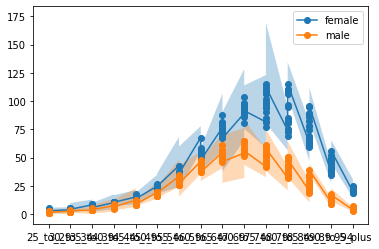

In [63]:
groups = tran_sum.groupby('sex')
for name, group in groups:
    plt.plot(group['age'], group['mean'], marker='o', label=name)
    plt.fill_between(group['age'], group['2.5%'], group['97.5%'], alpha=.3)
    
plt.legend()

In [64]:
per_time_inc = per_time.loc[(per_time['state'] == 'susceptible_to_ischemic_stroke')].reset_index()
per_time_inc.head()

,index,Unnamed: 0,sex,year,measure,input_draw,scenario,age,state,disease,ptvalue
0,30,30,female,2023,state_person_time,29,baseline,25_to_29,susceptible_to_ischemic_stroke,ischemic_stroke,29808.941821
1,31,31,female,2023,state_person_time,29,baseline,30_to_34,susceptible_to_ischemic_stroke,ischemic_stroke,28718.225873
2,32,32,female,2023,state_person_time,29,baseline,35_to_39,susceptible_to_ischemic_stroke,ischemic_stroke,28277.585216
3,33,33,female,2023,state_person_time,29,baseline,40_to_44,susceptible_to_ischemic_stroke,ischemic_stroke,26599.118412
4,34,34,female,2023,state_person_time,29,baseline,45_to_49,susceptible_to_ischemic_stroke,ischemic_stroke,27581.590691


In [65]:
per_time_inc = (per_time.groupby(['age', 'sex', 'year', 'input_draw']).ptvalue.sum().reset_index())

per_time_inc.head()

,age,sex,year,input_draw,ptvalue
0,25_to_29,female,2023,29,29969.774127
1,25_to_29,female,2023,232,30072.344969
2,25_to_29,female,2023,357,30068.971937
3,25_to_29,female,2023,394,30343.567420
4,25_to_29,female,2023,602,30302.017796


In [66]:
tran = tran.groupby(['age', 'sex', 'year', 'transition', 'input_draw']).value.sum().reset_index()
tran = tran.loc[(tran['transition'] == 'susceptible_to_ischemic_stroke_to_acute_ischemic_stroke')].reset_index()
tran_rate = pd.concat([tran, per_time_inc.ptvalue], axis=1)
tran_rate['rate']= tran_rate['value'] / tran_rate['ptvalue']
tran_rate = (tran_rate
                 .groupby(['age', 'sex', 'year'])
                 .rate.describe(percentiles=[.025, .975])
                 .filter(['mean', '2.5%', '97.5%'])
                 .reset_index())

tran_rate.head()

,age,sex,year,mean,2.5%,97.5%
0,25_to_29,female,2023,0.000113,0.000033,0.000276
1,25_to_29,female,2024,0.000180,0.000036,0.000344
2,25_to_29,female,2025,0.000109,0.000008,0.000245
3,25_to_29,female,2026,0.000121,0.000036,0.000249
4,25_to_29,female,2027,0.000115,0.000000,0.000384


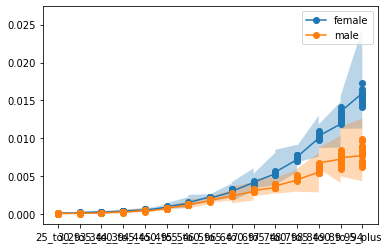

In [68]:
groups = tran_rate.groupby('sex')
for name, group in groups:
    plt.plot(group['age'], group['mean'], marker='o', label=name)
    plt.fill_between(group['age'], group['2.5%'], group['97.5%'], alpha=.3)
    
plt.legend()

In [69]:
female_2040_tran_rate = tran_rate.loc[(tran_rate['sex']=='female') & (tran_rate['year']==2040)]
female_2040_tran_rate.head()

,age,sex,year,mean,2.5%,97.5%
17,25_to_29,female,2040,0.000115,0.000009,0.000230
53,30_to_34,female,2040,0.000161,0.000038,0.000375
89,35_to_39,female,2040,0.000217,0.000076,0.000372
125,40_to_44,female,2040,0.000386,0.000267,0.000620
161,45_to_49,female,2040,0.000508,0.000281,0.000705


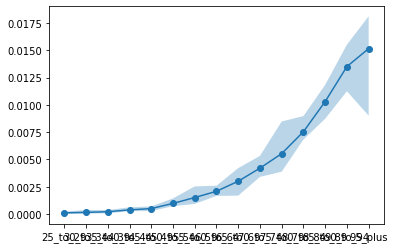

In [70]:
plt.plot(female_2040_tran_rate['age'], female_2040_tran_rate['mean'], marker='o')
plt.fill_between(female_2040_tran_rate['age'], female_2040_tran_rate['2.5%'], female_2040_tran_rate['97.5%'], alpha=.3)

In [71]:
female_6064_tran_rate = tran_rate.loc[(tran_rate['sex']=='female') & (tran_rate['age']=='60_to_64')]
female_6064_tran_rate.head()

,age,sex,year,mean,2.5%,97.5%
252,60_to_64,female,2023,0.002265,0.001860,0.002610
253,60_to_64,female,2024,0.001993,0.001544,0.002785
254,60_to_64,female,2025,0.002022,0.001662,0.002552
255,60_to_64,female,2026,0.001989,0.001407,0.002487
256,60_to_64,female,2027,0.002124,0.001863,0.002452


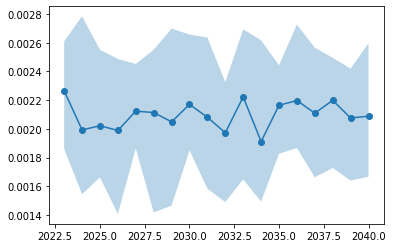

In [72]:
plt.plot(female_6064_tran_rate['year'], female_6064_tran_rate['mean'], marker='o')
plt.fill_between(female_6064_tran_rate['year'], female_6064_tran_rate['2.5%'], female_6064_tran_rate['97.5%'], alpha=.3)

### Artifacts

In [39]:
ls /mnt/share/costeffectiveness/artifacts/vivarium_nih_us_cvd/

alabama.hdf  washington.hdf


In [40]:
from vivarium import Artifact

#explore the artifact data (note age groups)
art = Artifact('/mnt/share/costeffectiveness/artifacts/vivarium_nih_us_cvd/alabama.hdf', filter_terms=['year_start == 2019', 'age_start >=  25'])

In [41]:
art_pop = art.load('population.structure').reset_index()
art_pop

,location,sex,age_start,age_end,year_start,year_end,value
0,Alabama,Female,25.0,30.0,2019,2020,171101.787730
1,Alabama,Female,30.0,35.0,2019,2020,162707.127245
2,Alabama,Female,35.0,40.0,2019,2020,160738.561697
3,Alabama,Female,40.0,45.0,2019,2020,151811.937430
...,...,...,...,...,...,...,...
26,Alabama,Male,80.0,85.0,2019,2020,39717.256293
27,Alabama,Male,85.0,90.0,2019,2020,20451.497955
28,Alabama,Male,90.0,95.0,2019,2020,8076.996387
29,Alabama,Male,95.0,125.0,2019,2020,2550.613480


In [42]:
art.keys

['metadata.keyspace',
 'metadata.locations',
 'population.location',
 'population.structure',
 'population.age_bins',
 'population.demographic_dimensions',
 'population.theoretical_minimum_risk_life_expectancy',
 'cause.all_causes.cause_specific_mortality_rate',
 'sequela.acute_ischemic_stroke.prevalence',
 'sequela.chronic_ischemic_stroke.prevalence',
 'cause.ischemic_stroke.incidence_rate',
 'sequela.acute_ischemic_stroke.disability_weight',
 'sequela.chronic_ischemic_stroke.disability_weight',
 'sequela.acute_ischemic_stroke.excess_mortality_rate',
 'sequela.chronic_ischemic_stroke.excess_mortality_rate',
 'cause.ischemic_stroke.cause_specific_mortality_rate',
 'cause.ischemic_stroke.restrictions',
 'cause.acute_myocardial_infarction.prevalence',
 'cause.post_myocardial_infarction.prevalence',
 'cause.acute_myocardial_infarction.incidence_rate',
 'cause.post_myocardial_infarction.incidence_rate',
 'cause.acute_myocardial_infarction.disability_weight',
 'cause.post_myocardial_infarct

In [43]:
art_mort = art.load('sequela.acute_ischemic_stroke.excess_mortality_rate').reset_index()
art_mort.head()

,sex,age_start,age_end,year_start,year_end,draw_0,draw_1,draw_2,draw_3,draw_4,...,draw_990,draw_991,draw_992,draw_993,draw_994,draw_995,draw_996,draw_997,draw_998,draw_999
0,Female,25.0,30.0,2019,2020,0.31588,0.40003,0.32045,0.38893,0.24140,...,0.27915,0.29902,0.33340,0.28170,0.45043,0.26388,0.31837,0.28815,0.23798,0.20685
1,Female,30.0,35.0,2019,2020,0.30193,0.33175,0.28828,0.37140,0.24475,...,0.27680,0.29742,0.35445,0.23455,0.42553,0.22783,0.26775,0.28548,0.25033,0.25325
2,Female,35.0,40.0,2019,2020,0.28018,0.29485,0.27522,0.29580,0.32445,...,0.29240,0.29728,0.32355,0.24025,0.35158,0.27568,0.30525,0.40163,0.30818,0.44195
3,Female,40.0,45.0,2019,2020,0.24315,0.27495,0.29525,0.26428,0.35000,...,0.28105,0.31522,0.29495,0.24098,0.31315,0.28515,0.32320,0.41060,0.31078,0.45695
4,Female,45.0,50.0,2019,2020,0.19085,0.27205,0.34835,0.27682,0.32140,...,0.24275,0.35128,0.26865,0.23673,0.31025,0.25625,0.32160,0.31240,0.25812,0.29825


In [44]:
def load_artifact_data(cause:str, measure:str):
    master_art_data = pd.DataFrame()
    for i in ['alabama']: #in case there are other countries
        
        # grab main artifact object
        art = Artifact('/mnt/share/costeffectiveness/artifacts/vivarium_nih_us_cvd/' + i + '.hdf', 
                   filter_terms=['year_start == 2019', 'age_start >=  25']) # << MIGHT WANT TO CHANGE THESE TERMS
        
        # load requested measure
        data = art.load('cause.' + cause + '.' + measure)
        
        # collapse to desired percentiles
        data = data.apply(pd.DataFrame.describe, percentiles=[0.025, 0.975], axis=1).filter(['mean', '2.5%', '97.5%']).reset_index()
        
        # formatting (may want to format age as well)
        data['location'] = i.capitalize()
        data['measure'] = measure
        data['sex'] = np.where(data['sex'] == 'Female', 'female', 'male')
    
   
        master_art_data = master_art_data.append(data)
        
    return master_art_data

In [45]:
art_acmr = load_artifact_data('all_causes', 'cause_specific_mortality_rate')
art_acmr['age_group'] = [f'{int(i)}_to_{int(j) - 1}' for (i,j) in zip(art_acmr.age_start,art_acmr.age_end)]
art_acmr.head()

,sex,age_start,age_end,year_start,year_end,mean,2.5%,97.5%,location,measure,age_group
0,female,25.0,30.0,2019,2020,0.000950,0.000706,0.001237,Alabama,cause_specific_mortality_rate,25_to_29
1,female,30.0,35.0,2019,2020,0.001364,0.001029,0.001755,Alabama,cause_specific_mortality_rate,30_to_34
2,female,35.0,40.0,2019,2020,0.001697,0.001285,0.002179,Alabama,cause_specific_mortality_rate,35_to_39
3,female,40.0,45.0,2019,2020,0.002592,0.001978,0.003305,Alabama,cause_specific_mortality_rate,40_to_44
4,female,45.0,50.0,2019,2020,0.003660,0.002792,0.004668,Alabama,cause_specific_mortality_rate,45_to_49


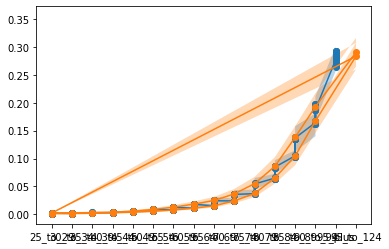

In [75]:
plt.plot(result_summary['age'], result_summary['mean'], marker='o')
plt.fill_between(result_summary['age'], result_summary['2.5%'], result_summary['97.5%'], alpha=.3)
plt.plot(art_acmr['age_group'], art_acmr['mean'], marker='o')
plt.fill_between(art_acmr['age_group'], art_acmr['2.5%'], art_acmr['97.5%'], alpha=.3)

# this looks pretty funky! It's often because of different age group sorting in the different dataframes
    # let's take a look below...

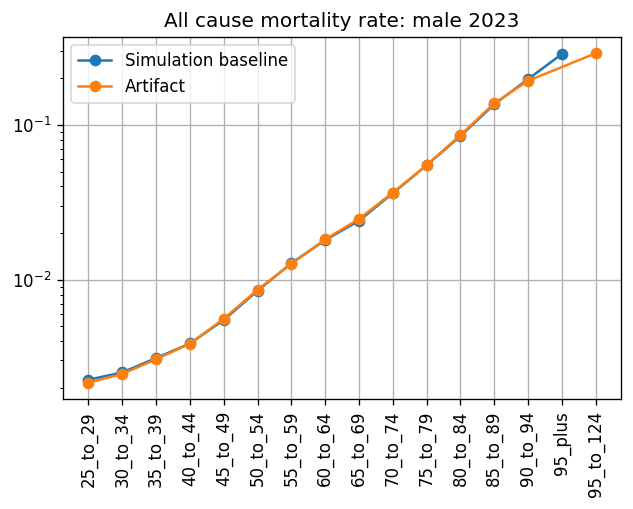

In [81]:
# if we restrict to a specific sex/year combo, it will be more interpretable

for sex in ['male']:
    for year in [2023]: #result_summary.year.unique():
        plt.figure(dpi=120) # this dpi makes the figure a little bigger and more clear
        plt.plot(result_summary.loc[(result_summary.sex==sex) & (result_summary.year==year)].age,
                result_summary.loc[(result_summary.sex==sex) & (result_summary.year==year)]['mean'], marker='o')
        plt.plot(art_acmr.loc[(art_acmr.sex==sex)].age_group,
                art_acmr.loc[(art_acmr.sex==sex)]['mean'], marker='o')
        plt.legend(['Simulation baseline', 'Artifact']) # legend so we know which color is which
        plt.xticks(rotation=90)
        plt.title(f'All cause mortality rate: {sex} {year}') # title for ease of review
        plt.grid()
        plt.semilogy() # sometimes for mortality rates it makes it easier to see the younger age groups
            # if you put it in log scale since there's such variation in ACMR by age

# our 95+ age group is not showing up the same, so we look a little more off than we are
# I didn't include the confidence intervals here, but you get the idea

# also, I'd say since we've already verified that there's not a big trend-by-year above, then we can
# probably move forward here with the "all-years" simulation result (re-calculate the result_summary dataframe,
# just without grouping by year this time)

In [99]:
# also, you can make a "function" to make these plots and then reuse it for different measures

def make_sim_vs_artifact_plots_by_age(sex, year, sim_data, art_data, measure):
    plt.figure(dpi=120) # this dpi makes the figure a little bigger and more clear
    plt.plot(sim_data.loc[(sim_data.sex==sex) & (sim_data.year==year)].age,
            sim_data.loc[(sim_data.sex==sex) & (sim_data.year==year)]['mean'], marker='o')
    plt.plot(art_data.loc[(art_data.sex==sex)].age_group,
            art_data.loc[(art_data.sex==sex)]['mean'], marker='o')
    plt.legend(['Simulation baseline', 'Artifact']) # legend so we know which color is which
    plt.xticks(rotation=90)
    plt.title(f'{measure}: {sex} {year}') # title for ease of review
    plt.grid()
    plt.semilogy()

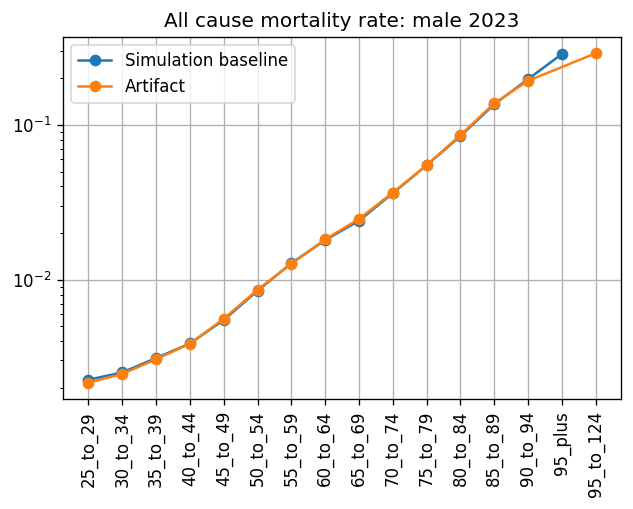

In [100]:
make_sim_vs_artifact_plots_by_age('male', 2023, result_summary, art_acmr, 'All cause mortality rate')

#then, you could input different dataframes for sim_data and art_data that contain different measures 
# (like prevalence/incidence/etc) and make a bunch of plots for different measures all at once.

# here's an example of a notebook that does this!
# https://github.com/ihmeuw/vivarium_research_iv_iron/blob/main/validation/child/model_2/model_2.1.1_cause_model_validation.ipynb

In [81]:
art_emr = load_artifact_data('ischemic_stroke', 'cause_specific_mortality_rate') # looks like this is actually CSMR, not EMR
art_emr['age_group'] = [f'{int(i)}_to_{int(j) - 1}' for (i,j) in zip(art_acmr.age_start,art_acmr.age_end)]
art_emr.head()

,sex,age_start,age_end,year_start,year_end,mean,2.5%,97.5%,location,measure,age_group
0,female,25.0,30.0,2019,2020,0.000002,0.000001,0.000003,Alabama,cause_specific_mortality_rate,25_to_29
1,female,30.0,35.0,2019,2020,0.000004,0.000002,0.000007,Alabama,cause_specific_mortality_rate,30_to_34
2,female,35.0,40.0,2019,2020,0.000006,0.000003,0.000009,Alabama,cause_specific_mortality_rate,35_to_39
3,female,40.0,45.0,2019,2020,0.000011,0.000007,0.000016,Alabama,cause_specific_mortality_rate,40_to_44
4,female,45.0,50.0,2019,2020,0.000017,0.000011,0.000026,Alabama,cause_specific_mortality_rate,45_to_49


In [89]:
plt.plot(acute_rate_summary['age'], acute_rate_summary['mean'], marker='o')
plt.fill_between(acute_rate_summary['age'], acute_rate_summary['2.5%'], acute_rate_summary['97.5%'], alpha=.3)
plt.plot(chronic_rate['age'], chronic_rate['mean'], marker='o')
plt.fill_between(chronic_rate['age'], chronic_rate['2.5%'], chronic_rate['97.5%'], alpha=.3)
plt.plot(art_emr['age_group'], art_emr['mean'], marker='o')
plt.fill_between(art_emr['age_group'], art_emr['2.5%'], art_emr['97.5%'], alpha=.3)

NameError: name 'acute_rate_summary' is not defined

In [88]:
# if we restrict to a specific sex/year combo, it will be more interpretable

for sex in ['male']:
    for year in [2023]: #result_summary.year.unique():
        plt.figure(dpi=120) # this dpi makes the figure a little bigger and more clear
        plt.plot(acute_rate_summary.loc[(acute_rate_summary.sex==sex) & (acute_rate_summary.year==year)].age,
                acute_rate_summary.loc[(acute_rate_summary.sex==sex) & (acute_rate_summary.year==year)]['mean'], marker='o')
        plt.plot(art_acmr.loc[(art_acmr.sex==sex)].age_group,
                art_acmr.loc[(art_acmr.sex==sex)]['mean'], marker='o')
        plt.legend(['Simulation baseline', 'Artifact']) # legend so we know which color is which
        plt.xticks(rotation=90)
        plt.title(f'All cause mortality rate: {sex} {year}') # title for ease of review
        plt.grid()
        plt.semilogy() # sometimes for mortality rates it makes it easier to see the younger age groups
            # if you put it in log scale since there's such variation in ACMR by age

# our 95+ age group is not showing up the same, so we look a little more off than we are
# I didn't include the confidence intervals here, but you get the idea

# also, I'd say since we've already verified that there's not a big trend-by-year above, then we can
# probably move forward here with the "all-years" simulation result (re-calculate the result_summary dataframe,
# just without grouping by year this time)

NameError: name 'acute_rate_summary' is not defined

<Figure size 720x480 with 0 Axes>

### GBD Comparison

#### All Cause Mortality Rate

In [84]:
from db_queries import get_outputs as go

In [112]:
df = go("cause", gbd_round_id=5, age_group_id=[10,11,12,13,14,15,16,17,18,19,20,30,31,32,33], cause_id=294, measure_id=1, metric_id=3, location_id=523, year_id=2017, sex_id=[1,2])

In [106]:
df.head()

,age_group_id,cause_id,location_id,measure_id,metric_id,sex_id,year_id,acause,age_group_name,cause_name,expected,location_name,location_type,measure_name,metric_name,sex,val,upper,lower
0,10,294,523,1,3,1,2017,_all,25 to 29,All causes,False,Alabama,admin1,Deaths,Rate,Male,0.002376,0.002729,0.002043
1,10,294,523,1,3,2,2017,_all,25 to 29,All causes,False,Alabama,admin1,Deaths,Rate,Female,0.001029,0.001216,0.000865
2,11,294,523,1,3,1,2017,_all,30 to 34,All causes,False,Alabama,admin1,Deaths,Rate,Male,0.002790,0.003207,0.002396
3,11,294,523,1,3,2,2017,_all,30 to 34,All causes,False,Alabama,admin1,Deaths,Rate,Female,0.001484,0.001756,0.001249
4,12,294,523,1,3,1,2017,_all,35 to 39,All causes,False,Alabama,admin1,Deaths,Rate,Male,0.003384,0.003948,0.002857


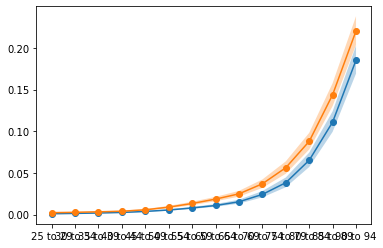

In [113]:
# I'd say it would be useful to add in the simulation results on these plots too!
# Then we can easily see that simulation results match artifact, which matches GBD data
    # OR if they don't match then we make sure there's a reason for that

groups = df.groupby('sex')
for name, group in groups:
    plt.plot(group['age_group_name'], group['val'], marker='o', label=name)
    plt.fill_between(group['age_group_name'], group['upper'], group['lower'], alpha=.3)

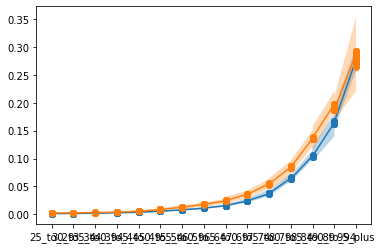

In [114]:
groups = result_summary.groupby('sex')
for name, group in groups:
    plt.plot(group['age'], group['mean'], marker='o', label=name)
    plt.fill_between(group['age'], group['2.5%'], group['97.5%'], alpha=.3)

#### Incidence Rate

In [115]:
gbd_incd = go("cause", gbd_round_id=5, age_group_id=[10,11,12,13,14,15,16,17,18,19,20,30,31,32,33], cause_id=495, measure_id=6, metric_id=3, location_id=523, year_id=2017, sex_id=[1,2])

In [116]:
gbd_incd.head()

,age_group_id,cause_id,location_id,measure_id,metric_id,sex_id,year_id,acause,age_group_name,cause_name,expected,location_name,location_type,measure_name,metric_name,sex,val,upper,lower
0,10,495,523,6,3,1,2017,cvd_stroke_isch,25 to 29,Ischemic stroke,False,Alabama,admin1,Incidence,Rate,Male,0.000063,0.000113,0.000024
1,10,495,523,6,3,2,2017,cvd_stroke_isch,25 to 29,Ischemic stroke,False,Alabama,admin1,Incidence,Rate,Female,0.000080,0.000134,0.000034
2,11,495,523,6,3,1,2017,cvd_stroke_isch,30 to 34,Ischemic stroke,False,Alabama,admin1,Incidence,Rate,Male,0.000135,0.000198,0.000083
3,11,495,523,6,3,2,2017,cvd_stroke_isch,30 to 34,Ischemic stroke,False,Alabama,admin1,Incidence,Rate,Female,0.000145,0.000213,0.000089
4,12,495,523,6,3,1,2017,cvd_stroke_isch,35 to 39,Ischemic stroke,False,Alabama,admin1,Incidence,Rate,Male,0.000265,0.000397,0.000161


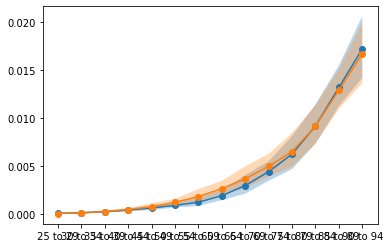

In [117]:
groups = gbd_incd.groupby('sex')
for name, group in groups:
    plt.plot(group['age_group_name'], group['val'], marker='o', label=name)
    plt.fill_between(group['age_group_name'], group['upper'], group['lower'], alpha=.3)

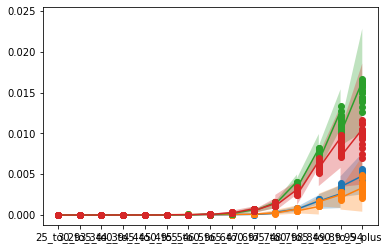

In [119]:
groups = acute_rate_summary.groupby('sex')
for name, group in groups:
    plt.plot(group['age'], group['mean'], marker='o')
    plt.fill_between(group['age'], group['2.5%'], group['97.5%'], alpha=.3)
groups2 = chronic_rate.groupby('sex')
for name, group in groups2:
    plt.plot(group['age'], group['mean'], marker='o')
    plt.fill_between(group['age'], group['2.5%'], group['97.5%'], alpha=.3)